In [1]:
import pandas as pd

In [2]:
oil = pd.read_csv("../retail/oil.csv")

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any intersesting patterns here? 

What happened in 2014 to oil price?

In [3]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


<Axes: xlabel='date'>

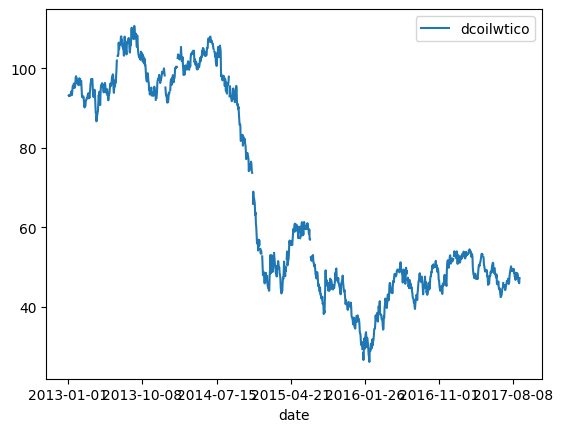

In [4]:
oil.plot(x='date',y='dcoilwtico')

In [5]:
#increased supply and low demand was the main reason

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

In [6]:
import seaborn as sns

In [7]:
sns.set_style('darkgrid')

<Axes: title={'center': ' 2013-2017'}, xlabel='date', ylabel='money'>

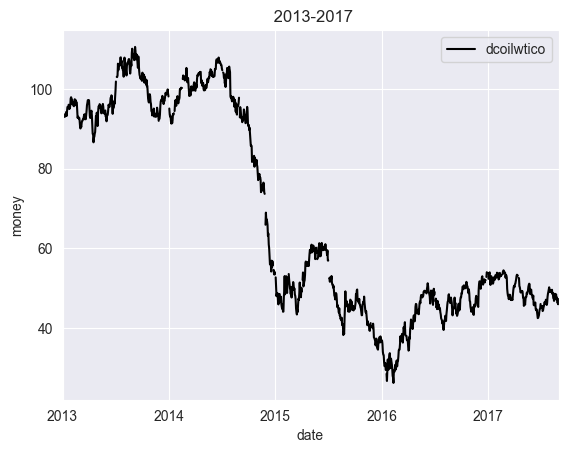

In [8]:
oil_plt=oil.astype({'date':'datetime64[ns]'})

oil_plt.plot(
    title=' 2013-2017',
    x='date',
    y='dcoilwtico',
    xlabel='date',
    ylabel='money',
    color='black'
)


# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [9]:
transactions = pd.read_csv("../retail/transactions.csv")

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

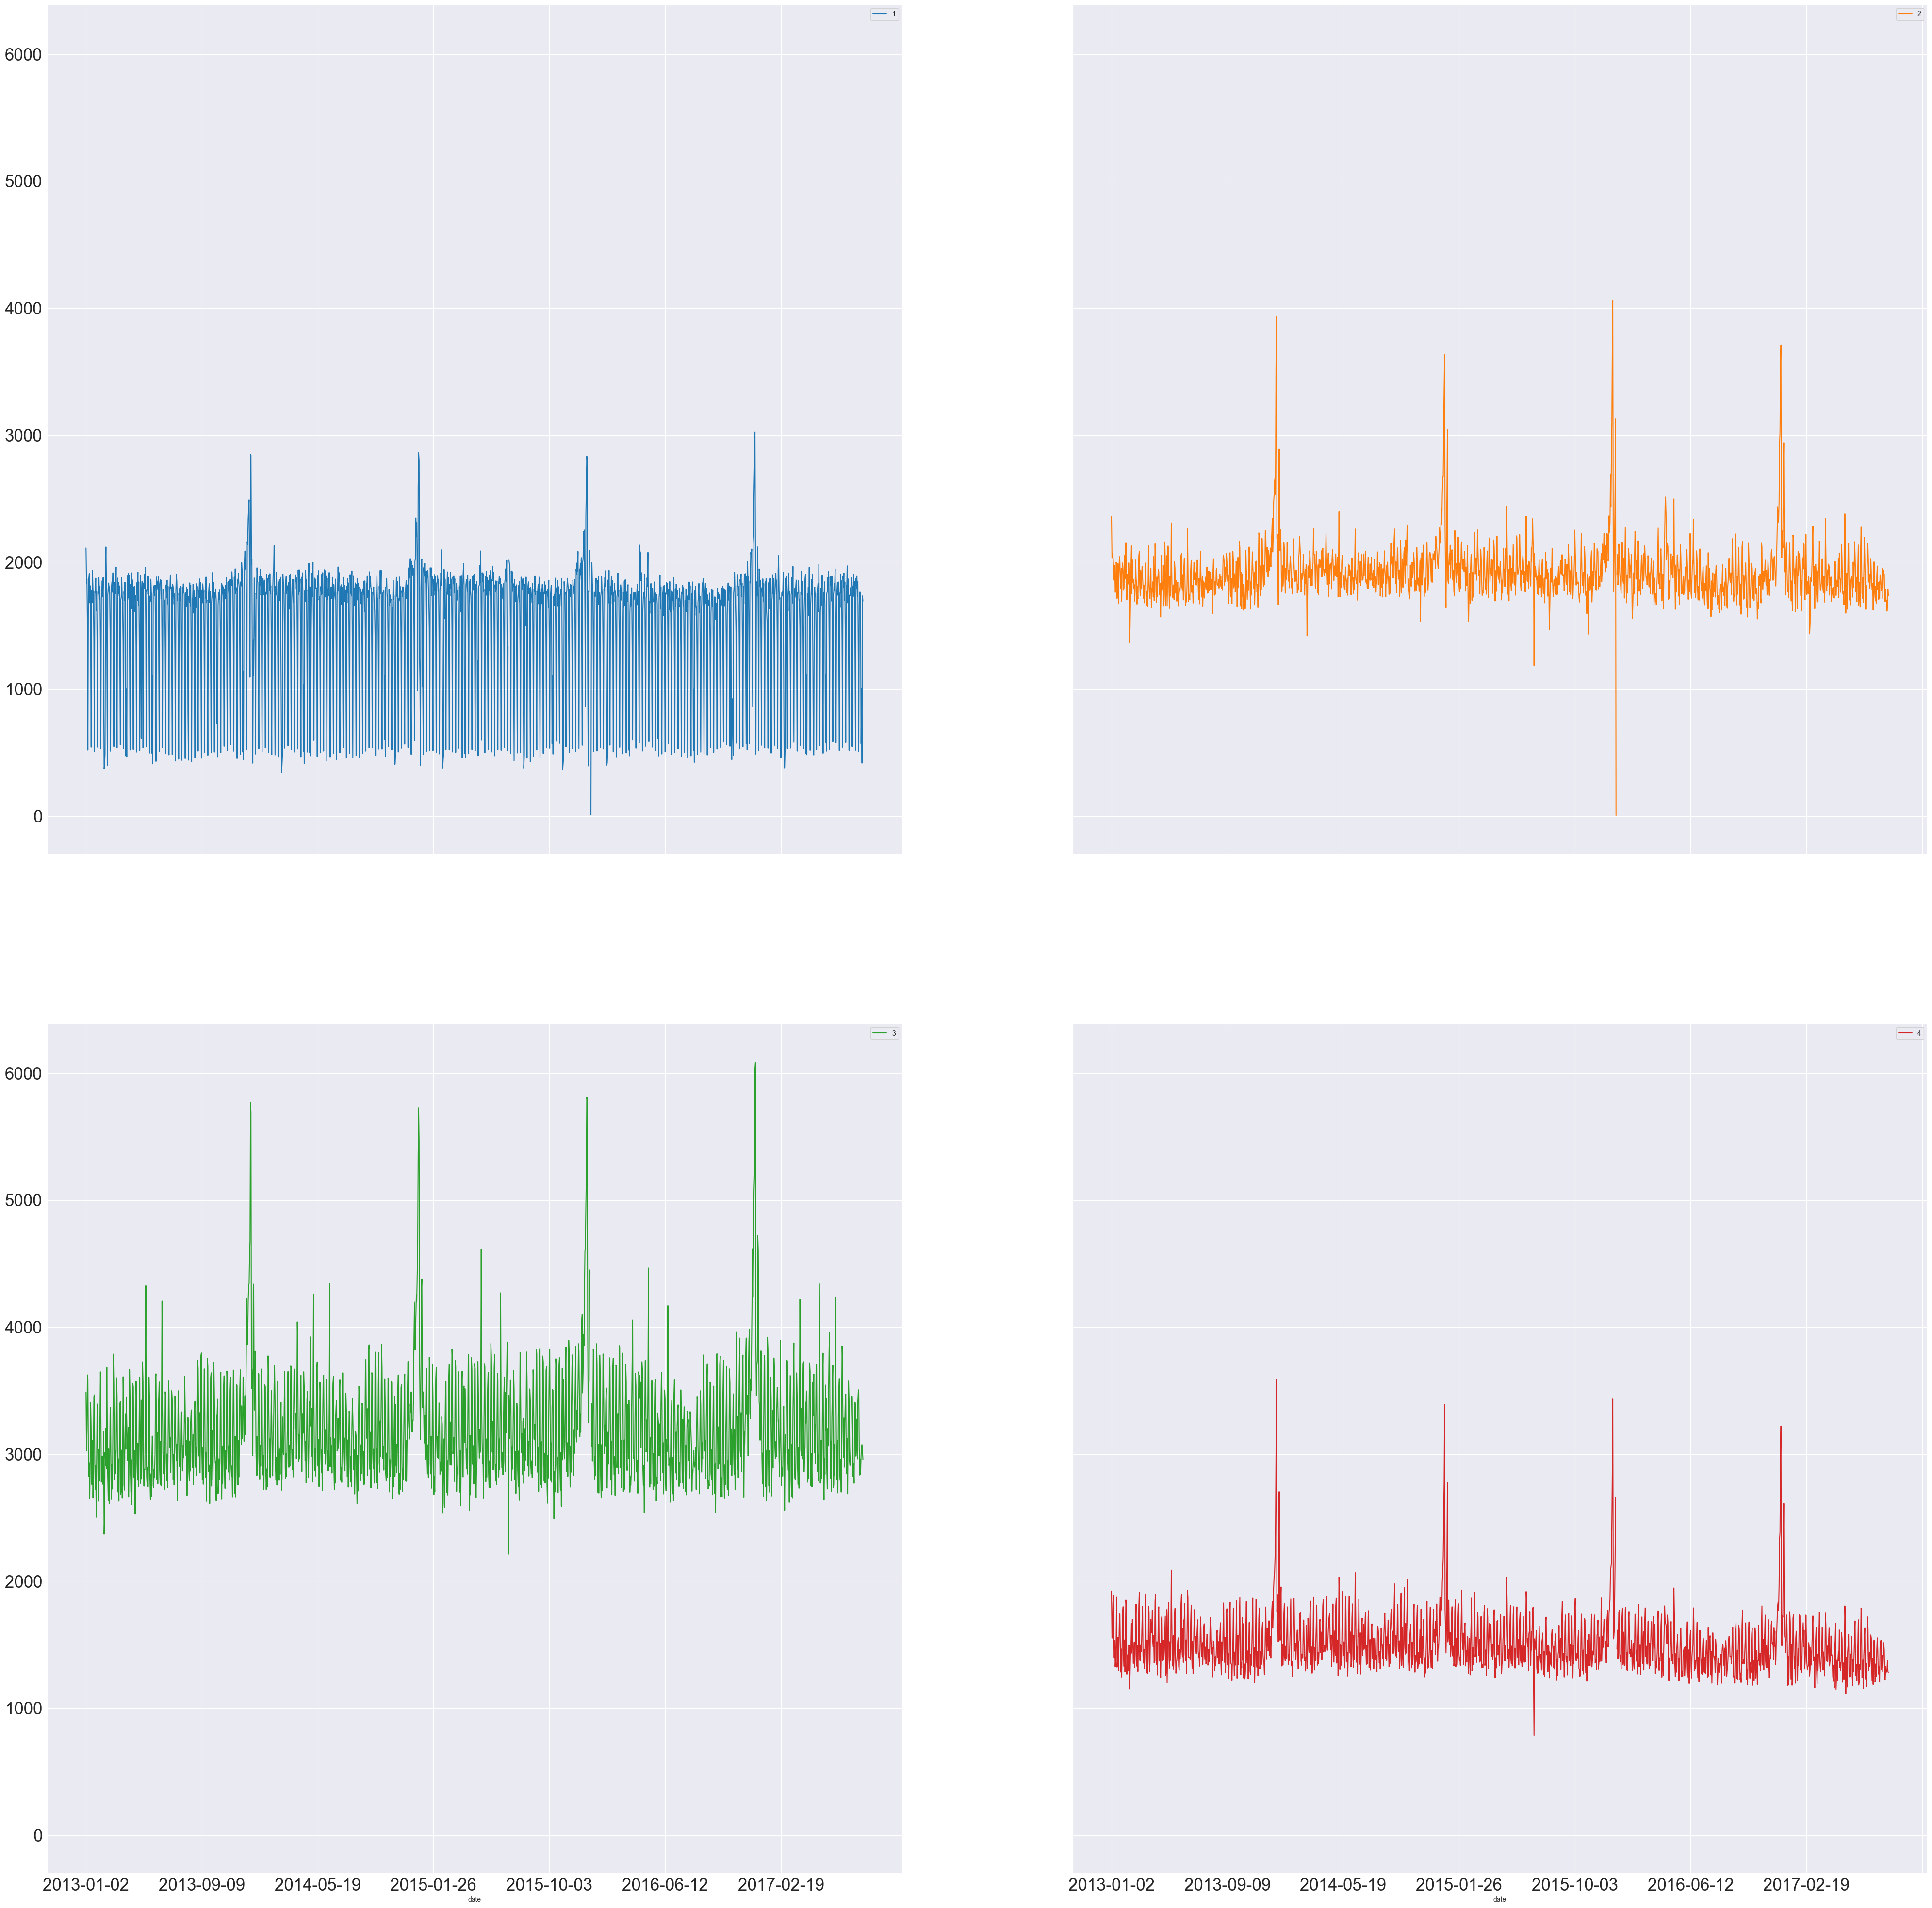

In [10]:
tran_plt=transactions.query('store_nbr in[1,2,3,4]')

tran_plt.pivot_table(
    index='date',
    columns='store_nbr',

).droplevel(0,axis=1).plot(
    subplots=True,
    layout=(2,2),
    sharey=True,
    figsize=(50,50),
    fontsize=25
)

In [11]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

<Axes: xlabel='store_nbr'>

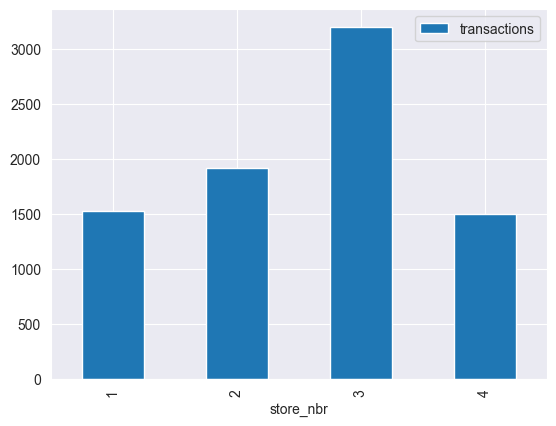

In [12]:
# convert dates to datetime64

tran_plt.drop('date',axis=1).pivot_table(
    index='store_nbr',
).plot.bar()

<Axes: xlabel='date'>

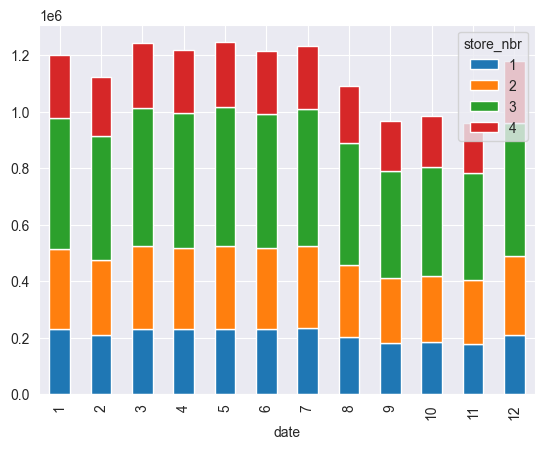

In [13]:
# stores_1234.index.month will allow you to groupby the month! You can also slice it.
t=transactions.astype({'date':'datetime64[ns]'}).query('store_nbr in [1,2,3,4]')
t.pivot_table(
    index=t['date'].dt.month,
    columns='store_nbr',
    values='transactions',
    aggfunc='sum'

).plot.bar(stacked=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

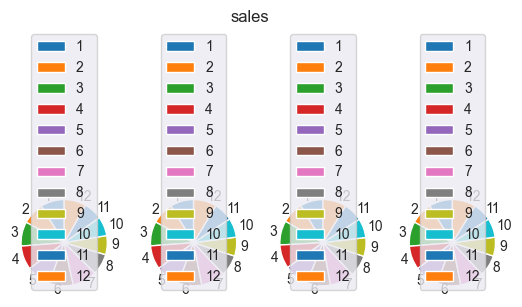

In [14]:
t.pivot_table(
    index=t['date'].dt.month,
    columns='store_nbr',
    values='transactions',
    aggfunc='sum'

).plot.pie(title='sales',ylabel="",startangle=90,subplots=True)

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

<Axes: title={'center': 'relations between store 2 and 3 '}, xlabel='store 2', ylabel='store 3'>

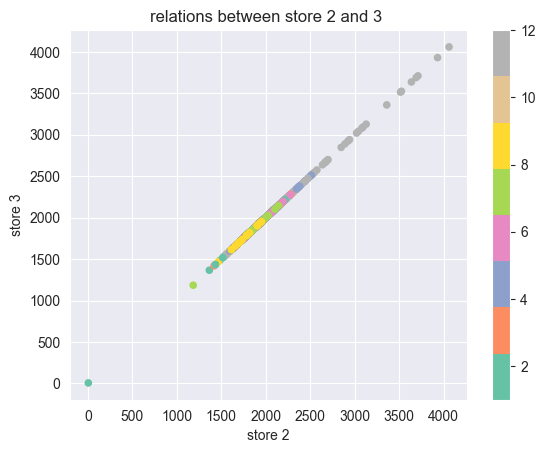

In [15]:
#find relation

new_t=t.query('store_nbr in [2,3]').pivot_table(
    index='date',
    columns='store_nbr'
).droplevel(level=0,axis=1)
new_t

new_t.plot.scatter(

    x=2,
    y=2,
    title='relations between store 2 and 3 ',
    xlabel='store 2',
    ylabel='store 3',
    c=new_t.index.month,
    colormap='Set2'
   
    )

# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


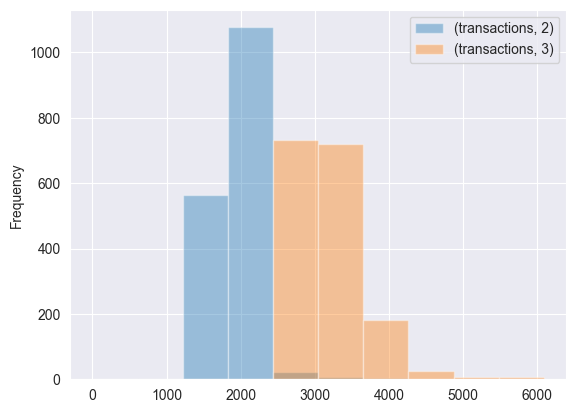

In [16]:
transactions.query('store_nbr in [2,3]').drop('date',axis=1).pivot_table(
    index=transactions.query('store_nbr in [2,3]').index,
    columns='store_nbr'
).plot.hist(alpha=0.4).legend(bbox_to_anchor=(1,1))